In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')

sns.set()

drive.mount('/content/drive')
dataset = '/content/drive/MyDrive/fakultet/colab/clean_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cars = pd.read_csv(dataset)
cars.head()

,Cijena,Kilometraza,Zapremina_motora,Snaga_motora,Registrovan,Godina,Brand_enc,Model_enc,Tip_enc,Gorivo_enc
0,13700.0,188001.0,2.0,130.0,0,2008.0,2,36,4,1
1,29999.0,130000.0,2.2,125.0,1,2013.0,30,148,4,1
2,9000.0,300000.0,1.7,92.0,1,2010.0,33,617,6,1
3,16100.0,287600.0,1.6,77.0,1,2013.0,48,425,4,1
4,24999.0,145000.0,2.0,110.0,0,2008.0,2,615,1,0


In [9]:

X = cars.drop('Cijena', axis=1)
y = cars['Cijena']

X.shape, y.shape

((12966, 9), (12966,))

In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10372, 9), (10372,), (2594, 9), (2594,))

Ovdje smo uzeli X i Y, te podijelili ih na train i test podatke u omjer 20:80.


In [11]:
from sklearn.ensemble import  RandomForestRegressor

rf_1 = RandomForestRegressor()

rf_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:

rf_1.fit(X_train, y_train)

RandomForestRegressor()

Prvo kreiramo base model onda kasnije cu podesavati hyperparametre

In [54]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))


y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))


y_pred_test = rf_1.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

RMSE on Traning data 2878.429277193879
RMSE on Testing data 2756.8947493443197
Traning Score: 0.9754708989703732
Testing Score: 0.9756542223458172


Dobili smo odlične rezultate, ali ćemo pokušati još ih unaprijediti.
Vidimo da je prosječna greška skoro ista i na trening i na test skupu što nam govori da nije došlo ni do over ni do underfita.


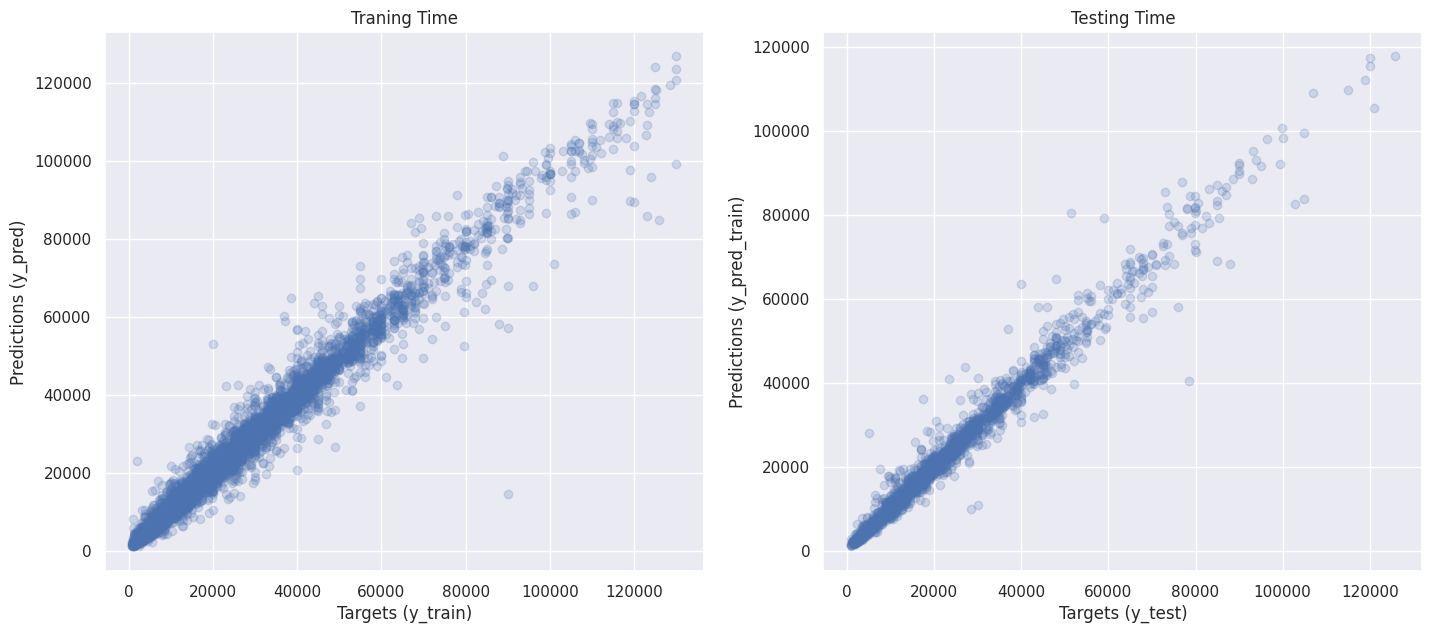

In [56]:

plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');


y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

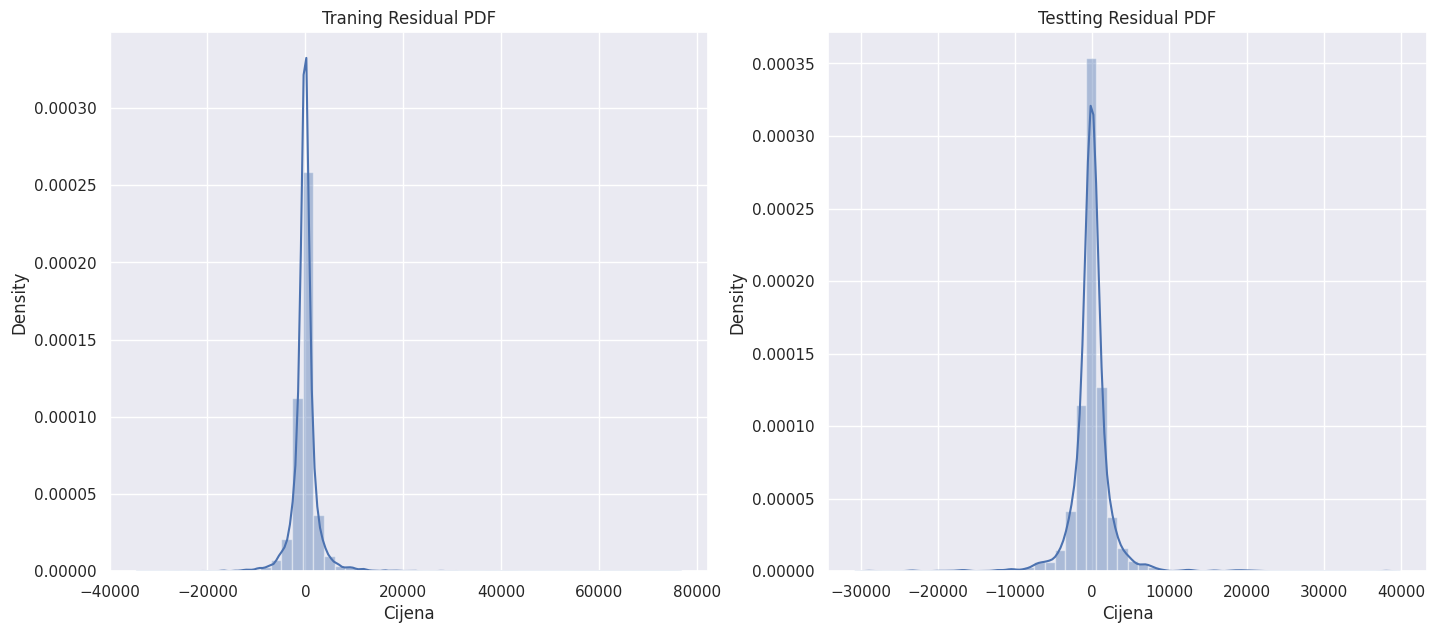

In [57]:

residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))


plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');


plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

In [58]:

df_eval = pd.DataFrame(rf_1.predict(X_test), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test


df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)

df_eval

,Prediction,Tareget,Residual,Difference%
0,28751.57,30000.0,1248.43,4.161433
1,26629.09,26500.0,-129.09,0.487132
2,8443.40,8500.0,56.60,0.665882
3,8981.37,7200.0,-1781.37,24.741250
4,11300.86,11500.0,199.14,1.731652
...,...,...,...,...
2589,15065.67,14990.0,-75.67,0.504803
2590,15868.84,14500.0,-1368.84,9.440276
2591,17669.68,18999.0,1329.32,6.996789
2592,13732.48,14500.0,767.52,5.293241


In [59]:

df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,2594.000000,2594.000000,2594.000000,2594.000000
mean,21783.249683,21651.634541,-131.615142,8.658750
std,17339.870805,17672.259824,2754.282226,16.318762
min,1073.160000,800.000000,-28958.860000,0.004128
25%,10237.987500,9900.000000,-837.450000,2.120645
50%,16963.140000,16700.000000,-103.430000,4.482746
75%,28158.202500,27967.500000,609.182500,9.287182
max,117675.280000,125813.000000,38104.333333,460.616400


In [52]:

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomForestRegressor()


random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None], # broj nivoa u svakom decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [100,200]} # koliko decision trees


rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=8,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [53]:

y_pred_train = rf_random.predict(X_train)

from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

y_pred_test = rf_random.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

from sklearn.metrics import r2_score

y_pred_train = rf_random.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))


y_pred_test = rf_random.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

RMSE on Traning data 1510.8971303215092
RMSE on Testing data 4843.682546580242
Traning Score: 0.9932416559320578
Testing Score: 0.9248490244513824


Rezultatit nisu losi, ali  imamo overfit, pokusacemo sa GridSearch


In [37]:

from sklearn.model_selection import GridSearchCV

rf_grid_model = RandomForestRegressor()


param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}


rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [46]:
y_pred_train = rf_grid.predict(X_train)

from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

y_pred_test = rf_grid.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

from sklearn.metrics import r2_score

y_pred_train = rf_grid.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

# chceking the socre for testing.

y_pred_test = rf_grid.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

RMSE on Traning data 711.6717909733918
RMSE on Testing data 4892.364172350368
Traning Score: 0.9985005568353371
Testing Score: 0.9233308174092407


Dakle imamo overfit, pa ćemo pokušati opet s tim da cemo smanjiti dubinu cvorova, min samples cemo ostaviti na 1, povecavamo min samples split, i smanjujemo broj decision trees.

In [39]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                       min_samples_split=3, n_estimators=150),
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 150},
 0.9208173765274683)

In [40]:

rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1,
                       verbose=8)


rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [47]:
y_pred_train = rf_grid_2.predict(X_train)

from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

y_pred_test = rf_grid_2.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

from sklearn.metrics import r2_score

y_pred_train = rf_grid_2.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

# chceking the socre for testing.

y_pred_test = rf_grid_2.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

RMSE on Traning data 720.1669371367689
RMSE on Testing data 4962.573547427034
Traning Score: 0.9984645458117714
Testing Score: 0.9211144984054198


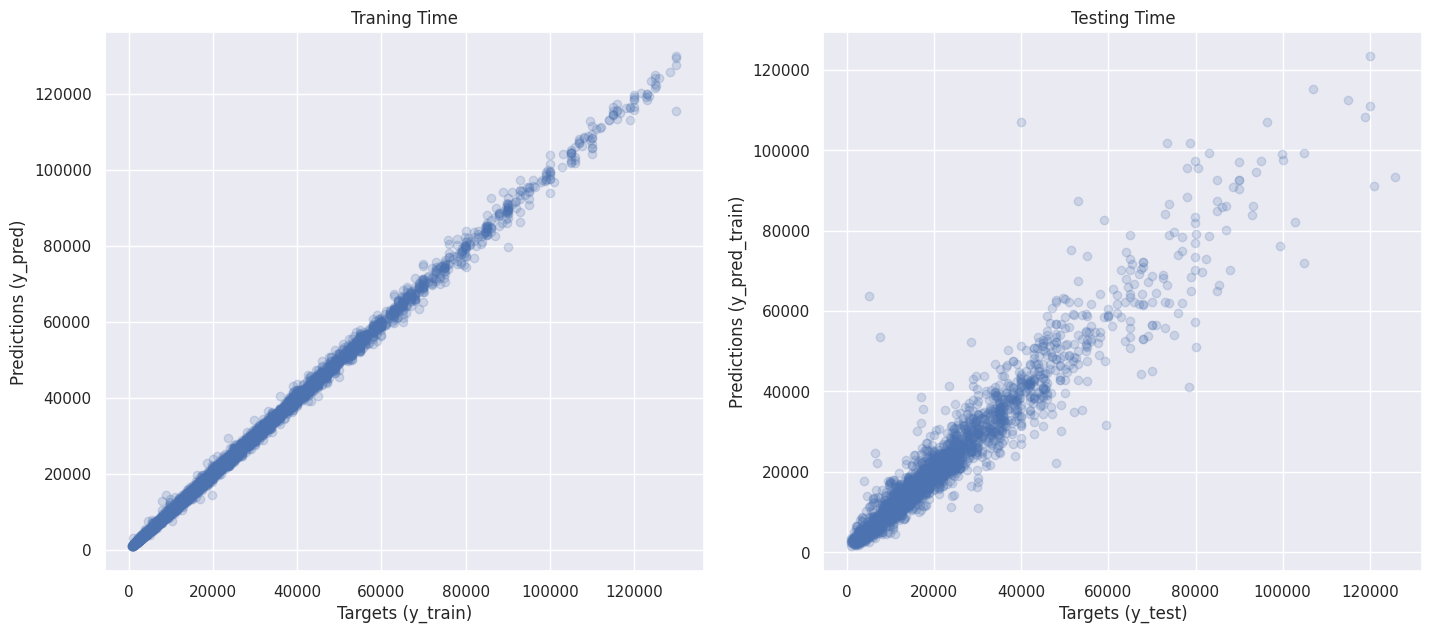

In [42]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

Pokusacemo i sa XGBoost modelom na istim skupovima

In [43]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.20, random_state=42, shuffle = True)

model = XGBRegressor(random_state=42,
                     tree_method="hist",
                     eval_metric="mae" ,
                     max_depth=5,
                     n_estimators =250,
                     colsample_bytree = 0.5,
                     enable_categorical=True,
                    max_cat_to_onehot=21,
)


model.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=21, max_delta_step=None,
             max_depth=5, max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [48]:

y_pred_train = model.predict(X_train)

from sklearn.metrics import  mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

print('RMSE on Traning data {}'.format(rmse_train))

y_pred_test = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE on Testing data {}'.format(rmse_test))

from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)

print('Traning Score: {}'.format(r2_score(y_train, y_pred_train)))

y_pred_test = model.predict(X_test)
print('Testing Score: {}'.format(r2_score(y_test, y_pred_test)))

RMSE on Traning data 2562.0942178048817
RMSE on Testing data 4933.0497160828745
Traning Score: 0.9805660671409938
Testing Score: 0.9220503331119929


In [55]:
from joblib import dump

# Sačuvanje modela
dump(rf_1, 'random_forest_model.joblib')

['random_forest_model.joblib']

Dakle nakon sto uporedimo sve modele tj. base model za random forest, random search random forest, grid search rf1, grid search rf2 i na kraju xgb, vidimo da defaultni model daje najbolje rezultate, odnosno jedino kod njega ne dolazi do overfita tako da ćemo njega koristiti u nasoj aplikaciji